In [ ]:
#getting the dataset from kaggle
#import kaggle

In [ ]:
#!kaggle datasets list -s gene

In [ ]:
#!kaggle datasets download crawford/gene-expression -p C:/Users/Shru/Documents/drug_ind --unzip

In [1]:
#import the libraries needed for visualization
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
os.getcwd()

'C:\\Users\\Shru\\Documents\\Datasets'

In [3]:
path = 'C:\\Users\\Shru\\Documents\\Datasets'
os.chdir(path)

In [5]:
os.listdir('gene_expression')

['actual.csv',
 'data_set_ALL_AML_independent.csv',
 'data_set_ALL_AML_train.csv']

In [6]:
#Load the data and start cleaning
df_train_init = pd.read_csv('gene_expression/data_set_ALL_AML_train.csv')
df_train = df_train_init.T.reset_index()
df_train.columns = df_train.iloc[1]
df_train = df_train.drop([0,1])
df_train = df_train.rename(columns={'Gene Accession Number':'Patient_Num'})


In [7]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 2 to 77
Columns: 7130 entries, Patient_Num to Z78285_f_at
dtypes: object(7130)
memory usage: 4.1+ MB
None


1,Patient_Num,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
3,call,A,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,A,A,A
4,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,169,837,-36,442,-17,782,295,11,76,-14
5,call.1,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
6,3,-76,-49,-307,309,-376,-650,33,-367,206,...,315,1199,33,168,52,1138,777,41,228,-41


In [38]:
df_train.head()

1,Patient Num,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
3,call,A,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,A,A,A
4,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,169,837,-36,442,-17,782,295,11,76,-14
5,call.1,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
6,3,-76,-49,-307,309,-376,-650,33,-367,206,...,315,1199,33,168,52,1138,777,41,228,-41


In [8]:
index_list = list(df_train['Patient_Num'])

for i in range(len(index_list)):
    if 'call' in index_list[i]:
        num = int(''.join(filter(str.isdigit, index_list[i])) or 0)
        index_list[i] = str(num+1) + '_call'
    else:
        num2 = int(''.join(filter(str.isdigit, index_list[i])) or 0)
        index_list[i] = str(num2)

print(index_list)

['1', '1_call', '2', '2_call', '3', '3_call', '4', '4_call', '5', '5_call', '6', '6_call', '7', '7_call', '8', '8_call', '9', '9_call', '10', '10_call', '11', '11_call', '12', '12_call', '13', '13_call', '14', '14_call', '15', '15_call', '16', '16_call', '17', '17_call', '18', '18_call', '19', '19_call', '20', '20_call', '21', '21_call', '22', '22_call', '23', '23_call', '24', '24_call', '25', '25_call', '26', '26_call', '27', '27_call', '34', '28_call', '35', '29_call', '36', '30_call', '37', '31_call', '38', '32_call', '28', '33_call', '29', '34_call', '30', '35_call', '31', '36_call', '32', '37_call', '33', '38_call']


In [9]:
df01 = df_train
result_set=dict(zip(df_train['Patient_Num'], index_list))
print(result_set)
df01['Patient_Num'] = df01.Patient_Num.map(dict(zip(df_train['Patient_Num'], index_list)))
print(df01['Patient_Num'])

{'1': '1', 'call': '1_call', '2': '2', 'call.1': '2_call', '3': '3', 'call.2': '3_call', '4': '4', 'call.3': '4_call', '5': '5', 'call.4': '5_call', '6': '6', 'call.5': '6_call', '7': '7', 'call.6': '7_call', '8': '8', 'call.7': '8_call', '9': '9', 'call.8': '9_call', '10': '10', 'call.9': '10_call', '11': '11', 'call.10': '11_call', '12': '12', 'call.11': '12_call', '13': '13', 'call.12': '13_call', '14': '14', 'call.13': '14_call', '15': '15', 'call.14': '15_call', '16': '16', 'call.15': '16_call', '17': '17', 'call.16': '17_call', '18': '18', 'call.17': '18_call', '19': '19', 'call.18': '19_call', '20': '20', 'call.19': '20_call', '21': '21', 'call.20': '21_call', '22': '22', 'call.21': '22_call', '23': '23', 'call.22': '23_call', '24': '24', 'call.23': '24_call', '25': '25', 'call.24': '25_call', '26': '26', 'call.25': '26_call', '27': '27', 'call.26': '27_call', '34': '34', 'call.27': '28_call', '35': '35', 'call.28': '29_call', '36': '36', 'call.29': '30_call', '37': '37', 'call.

In [10]:
type(df01.loc[33,'Patient_Num'])
df02 = df01[df01[['Patient_Num']].apply(lambda x: x[0].isdigit(), axis=1)]
df02.head(10)

1,Patient_Num,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,1,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
4,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,169,837,-36,442,-17,782,295,11,76,-14
6,3,-76,-49,-307,309,-376,-650,33,-367,206,...,315,1199,33,168,52,1138,777,41,228,-41
8,4,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
10,5,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25
12,6,-138,-85,215,71,-272,-558,67,-186,87,...,115,1221,-76,172,-74,645,341,26,193,-53
14,7,-72,-144,238,55,-399,-551,131,-179,126,...,30,819,-178,151,-18,1140,482,10,369,-42
16,8,-413,-260,7,-2,-541,-790,-275,-463,70,...,289,629,-86,302,23,1799,446,59,781,20
18,9,5,-127,106,268,-210,-535,0,-174,24,...,356,980,6,177,-12,758,385,115,244,-39
20,10,-88,-105,42,219,-178,-246,328,-148,177,...,42,986,26,101,21,570,359,9,171,7


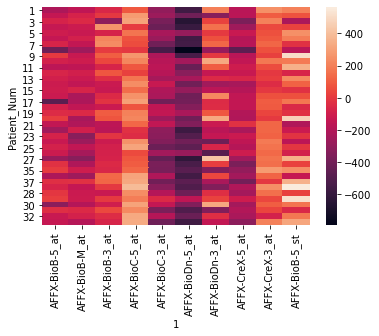

In [24]:
df03 = df02.set_index('Patient_Num')
df03 = df03.iloc[:,0:10]
df03 = df03.apply(pd.to_numeric)
sns.heatmap(df03)

In [39]:
df04 = df01[df01[['Patient_Num']].apply(lambda x: not x[0].isdigit(), axis=1)]
#df04.head(10)

A    38
Name: AFFX-BioB-5_st, dtype: int64
